In [2]:
import pandas as pd
from sqlalchemy import create_engine 

database_name = 'telecom'
table_name = 'xdr_data'

connection_params = { 
    "host": "localhost", 
    "user": "postgres", 
    "password": "1234",
    "port": "5432", 
    "database": database_name
}

engine = create_engine(f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}")

# str or SQLAlchemy Selectable (select or text object)
sql_query = 'SELECT * FROM xdr_data'
df = pd.read_sql(sql_query, con=engine)

# Save DataFrame as a CSV file
csv_filename = 'xdr_data.csv'
df.to_csv(csv_filename, index=False)

# Read from the CSV file
df_from_csv = pd.read_csv(csv_filename)

# Now you can use df_from_csv for further processing


In [3]:
import pandas as pd

# Read from the CSV file
csv_filename = 'xdr_data.csv'
df= pd.read_csv(csv_filename)

# Now you can use df_from_csv for further processing


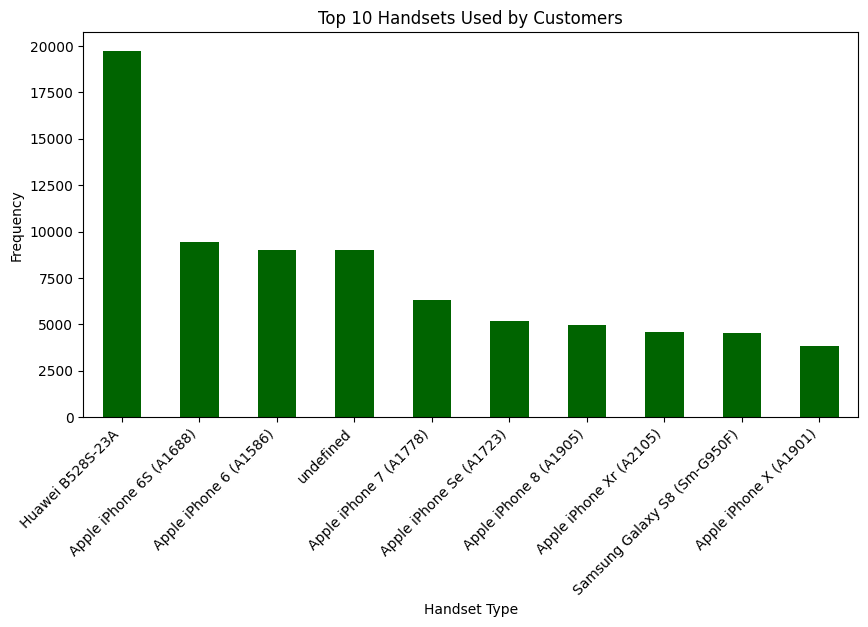

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Plotting the top 10 handsets
plt.figure(figsize=(10, 5))
top_10_handsets.plot(kind='bar', color='#006400')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


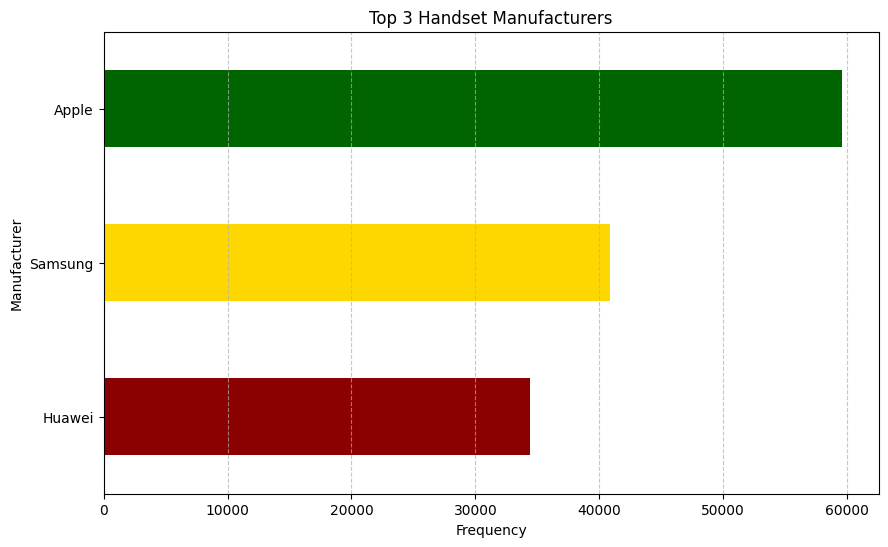

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
top_3_manufacturers = df['Handset Manufacturer'].str.split().str[0].value_counts().head(3)

# Define colors for the horizontal bar chart
colors = ['#8B0000', '#FFD700', '#006400']  # Dark red, yellow, and dark green

# Plotting the top 3 handset manufacturers using a horizontal bar chart
plt.figure(figsize=(10, 6))
top_3_manufacturers.sort_values().plot(kind='barh', color=colors)
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Frequency')
plt.ylabel('Manufacturer')
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding gridlines for better readability
plt.show()


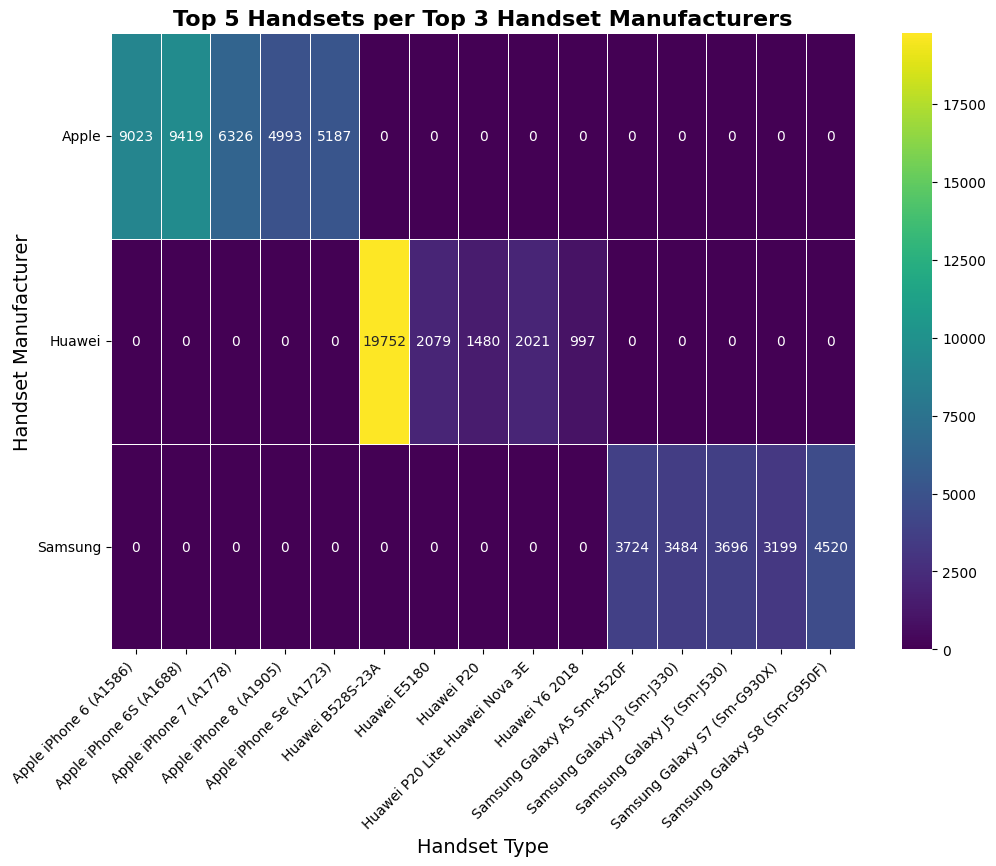

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame to include only data for top 3 manufacturers
top_3_df = df[df['Handset Manufacturer'].str.split().str[0].isin(top_3_manufacturers.index)]

# Identify the top 5 handsets per top 3 handset manufacturer
top_5_handsets = top_3_df.groupby(['Handset Manufacturer', 'Handset Type']).size().groupby(level=0, group_keys=False).nlargest(5)

# Reset index for plotting
top_5_handsets = top_5_handsets.reset_index()

# Pivot the DataFrame for plotting as a heatmap
pivot_df = top_5_handsets.pivot(index='Handset Manufacturer', columns='Handset Type', values=0).fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='g', linewidths=0.5, cbar=True)
plt.title('Top 5 Handsets per Top 3 Handset Manufacturers', fontsize=16, fontweight='bold')
plt.xlabel('Handset Type', fontsize=14)
plt.ylabel('Handset Manufacturer', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [7]:
# Aggregate the number of xDR sessions per user
sessions_per_user = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
sessions_per_user.columns = ['MSISDN/Number', 'Number of xDR Sessions']
print(sessions_per_user)


        MSISDN/Number  Number of xDR Sessions
0        3.360100e+10                       1
1        3.360100e+10                       1
2        3.360100e+10                       1
3        3.360101e+10                       1
4        3.360101e+10                       2
...               ...                     ...
106851   3.379000e+10                       1
106852   3.379000e+10                       1
106853   3.197021e+12                       1
106854   3.370000e+14                       1
106855   8.823971e+14                       1

[106856 rows x 2 columns]


In [9]:
# Convert 'Start' and 'End' columns to datetime objects if they are not already
df['Start'] = pd.to_datetime(df['Start'], errors='coerce')
df['End'] = pd.to_datetime(df['End'], errors='coerce')

# Calculate session duration in seconds
df['Session Duration (s)'] = (df['End'] - df['Start']).dt.total_seconds()

# Print the DataFrame with the added session duration column
print(df[['Start', 'End', 'Session Duration (s)']])


                     Start                 End  Session Duration (s)
0      2019-04-04 12:01:00 2019-04-25 14:35:00             1823640.0
1      2019-04-09 13:04:00 2019-04-25 08:15:00             1365060.0
2      2019-04-09 17:42:00 2019-04-25 11:58:00             1361760.0
3      2019-04-10 00:31:00 2019-04-25 07:36:00             1321500.0
4      2019-04-12 20:10:00 2019-04-25 10:40:00             1089000.0
...                    ...                 ...                   ...
149996 2019-04-29 07:28:00 2019-04-30 06:02:00               81240.0
149997 2019-04-29 07:28:00 2019-04-30 10:41:00               97980.0
149998 2019-04-29 07:28:00 2019-04-30 10:46:00               98280.0
149999 2019-04-29 07:28:00 2019-04-30 10:40:00               97920.0
150000                 NaT                 NaT                   NaN

[150001 rows x 3 columns]


In [12]:
# Define the DataFrame 'aggregated_df' if it's not defined before
aggregated_df = df.groupby('MSISDN/Number').agg({'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'}).reset_index()

# Convert bytes to megabytes (MB) and round to 2 decimal places
aggregated_df['Total DL (MB)'] = aggregated_df['Total DL (Bytes)'] / (1024 * 1024)
aggregated_df['Total DL (MB)'] = aggregated_df['Total DL (MB)'].round(2)

aggregated_df['Total UL (MB)'] = aggregated_df['Total UL (Bytes)'] / (1024 * 1024)
aggregated_df['Total UL (MB)'] = aggregated_df['Total UL (MB)'].round(2)

# Drop the original columns for total DL and UL data
aggregated_df.drop(columns=['Total DL (Bytes)', 'Total UL (Bytes)'], inplace=True)

# Merge the aggregated data with the total data per user
aggregated_df = aggregated_df.merge(total_data_per_user, on='MSISDN/Number', how='left')

# Print the aggregated DataFrame
print(aggregated_df)


        MSISDN/Number  Total DL (MB)_x  Total UL (MB)_x  Total DL (MB)_y  \
0        3.360100e+10           803.60            34.38           803.60   
1        3.360100e+10           115.16            34.43           115.16   
2        3.360100e+10           530.87            37.49           530.87   
3        3.360101e+10           383.37            19.39           383.37   
4        3.360101e+10          1299.98            89.91          1299.98   
...               ...              ...              ...              ...   
106851   3.379000e+10           656.06            25.48           656.06   
106852   3.379000e+10           423.98            34.08           423.98   
106853   3.197021e+12           185.80            35.57           185.80   
106854   3.370000e+14           514.64            54.03           514.64   
106855   8.823971e+14            75.05            57.66            75.05   

        Total UL (MB)_y  
0                 34.38  
1                 34.43  
2        

In [15]:
# Define the application categories
social_media_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)']
google_columns = ['Google DL (Bytes)', 'Google UL (Bytes)']
youtube_columns = ['Youtube DL (Bytes)', 'Youtube UL (Bytes)']
netflix_columns = ['Netflix DL (Bytes)', 'Netflix UL (Bytes)']
gaming_columns = ['Gaming DL (Bytes)', 'Gaming UL (Bytes)']
email_columns = ['Email DL (Bytes)', 'Email UL (Bytes)']
other_columns = ['Other DL (Bytes)', 'Other UL (Bytes)']

# Sum the total data volume for each application category
df['Total Social Media Data (Bytes)'] = df[social_media_columns].sum(axis=1)
df['Total Google Data (Bytes)'] = df[google_columns].sum(axis=1)
df['Total YouTube Data (Bytes)'] = df[youtube_columns].sum(axis=1)
df['Total Netflix Data (Bytes)'] = df[netflix_columns].sum(axis=1)
df['Total Gaming Data (Bytes)'] = df[gaming_columns].sum(axis=1)
df['Total Email Data (Bytes)'] = df[email_columns].sum(axis=1)
df['Total Other Data (Bytes)'] = df[other_columns].sum(axis=1)

# Group by session and calculate the total data volume of each application category
total_data_per_session = df.groupby('Bearer Id')[['Total Social Media Data (Bytes)',
                                                   'Total Google Data (Bytes)',
                                                   'Total YouTube Data (Bytes)',
                                                   'Total Netflix Data (Bytes)',
                                                   'Total Gaming Data (Bytes)',
                                                   'Total Email Data (Bytes)',
                                                   'Total Other Data (Bytes)']].sum().reset_index()

# Print the DataFrame with the total data volume per session for each application category
print(total_data_per_session)


           Bearer Id  Total Social Media Data (Bytes)  \
0       6.917538e+18                        2407151.0   
1       6.917538e+18                        2490543.0   
2       6.917538e+18                         947439.0   
3       6.917538e+18                        1837066.0   
4       6.917538e+18                        1886246.0   
...              ...                              ...   
134703  1.318654e+19                        3278510.0   
134704  1.318654e+19                        3111624.0   
134705  1.318654e+19                         763832.0   
134706  1.318654e+19                        2532365.0   
134707  1.318654e+19                        1342172.0   

        Total Google Data (Bytes)  Total YouTube Data (Bytes)  \
0                       8662927.0                   8211170.0   
1                       6430644.0                  28401197.0   
2                      10429549.0                   9681010.0   
3                       3966381.0                  2343

In [16]:
# Define the application categories
application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                       'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                       'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Other DL (Bytes)', 'Other UL (Bytes)']

# Sum the total data volume for each application category
for app in application_columns:
    df[f'Total {app.split(" ")[0]} Data (Bytes)'] = df[[app]].sum(axis=1)

# Group by user and calculate the total data volume of each application category
total_data_per_user = df.groupby('MSISDN/Number')[[f'Total {app.split(" ")[0]} Data (Bytes)' for app in application_columns]].sum().reset_index()

# Print the DataFrame with the total data volume per user for each application category
print(total_data_per_user)


        MSISDN/Number  Total Social Data (Bytes)  Total Social Data (Bytes)  \
0        3.360100e+10                    25631.0                    25631.0   
1        3.360100e+10                    62017.0                    62017.0   
2        3.360100e+10                    47619.0                    47619.0   
3        3.360101e+10                    28825.0                    28825.0   
4        3.360101e+10                    51312.0                    51312.0   
...               ...                        ...                        ...   
106851   3.379000e+10                    65863.0                    65863.0   
106852   3.379000e+10                    56355.0                    56355.0   
106853   3.197021e+12                    46628.0                    46628.0   
106854   3.370000e+14                    25229.0                    25229.0   
106855   8.823971e+14                    45943.0                    45943.0   

        Total Google Data (Bytes)  Total Google Dat

In [5]:
# Assuming you have already aggregated the total data per user
# You can create a DataFrame with sample data for demonstration purposes
import pandas as pd

# Sample data for demonstration
data = {
    'MSISDN/Number': ['123456789', '987654321', '456789123'],
    'Total Social Media Data (MB)': [100, 200, 150],
    'Total Google Data (MB)': [300, 400, 350],
    'Total Youtube Data (MB)': [200, 300, 250],
    'Total Netflix Data (MB)': [150, 250, 200],
    'Total Gaming Data (MB)': [500, 600, 550],
    'Total Email Data (MB)': [50, 100, 80],
    'Total Other Data (MB)': [200, 300, 250]
}

# Create DataFrame
total_data_per_user = pd.DataFrame(data)

# Display the DataFrame
print(total_data_per_user)


  MSISDN/Number  Total Social Media Data (MB)  Total Google Data (MB)  \
0     123456789                           100                     300   
1     987654321                           200                     400   
2     456789123                           150                     350   

   Total Youtube Data (MB)  Total Netflix Data (MB)  Total Gaming Data (MB)  \
0                      200                      150                     500   
1                      300                      250                     600   
2                      250                      200                     550   

   Total Email Data (MB)  Total Other Data (MB)  
0                     50                    200  
1                    100                    300  
2                     80                    250  


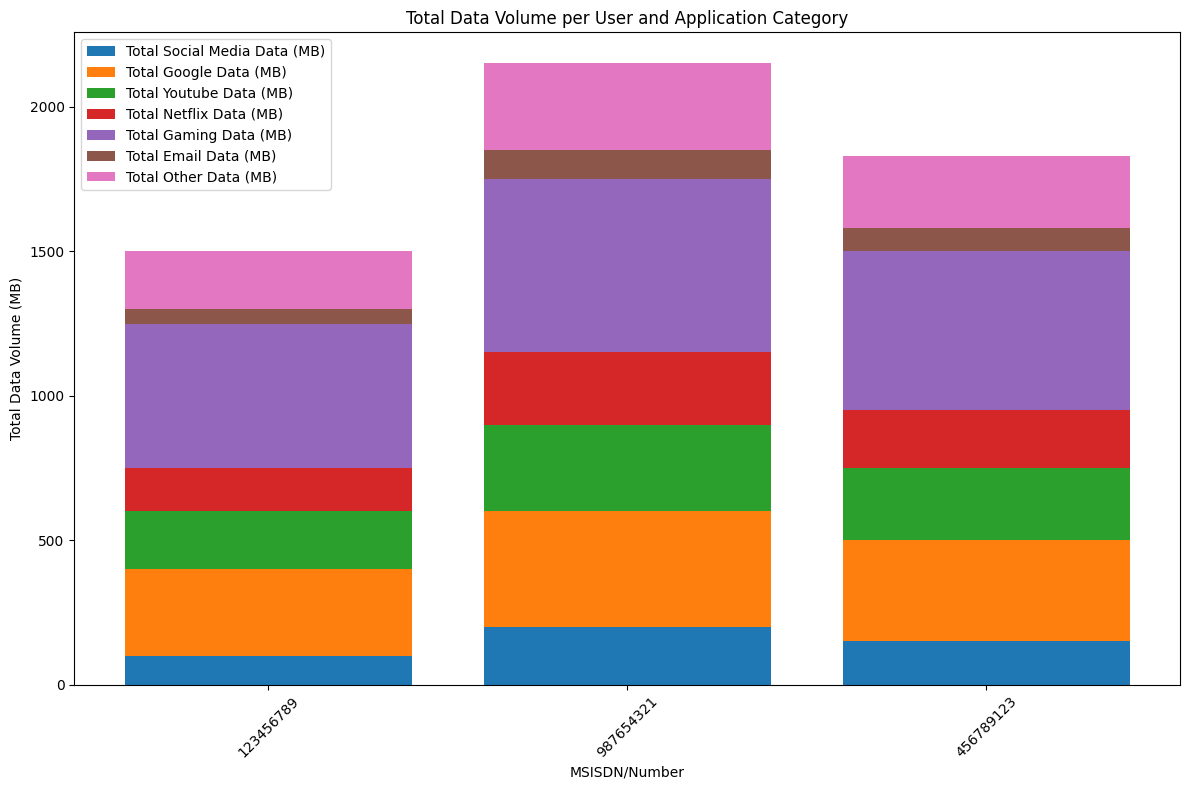

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for demonstration
data = {
    'MSISDN/Number': ['123456789', '987654321', '456789123'],
    'Total Social Media Data (MB)': [100, 200, 150],
    'Total Google Data (MB)': [300, 400, 350],
    'Total Youtube Data (MB)': [200, 300, 250],
    'Total Netflix Data (MB)': [150, 250, 200],
    'Total Gaming Data (MB)': [500, 600, 550],
    'Total Email Data (MB)': [50, 100, 80],
    'Total Other Data (MB)': [200, 300, 250]
}

# Create DataFrame
total_data_per_user = pd.DataFrame(data)

# Define the application categories
application_columns = ['Social Media', 'Google', 'Youtube', 'Netflix', 'Gaming', 'Email', 'Other']

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate over each application category and plot the data
bottom = None
for app in application_columns:
    plt.bar(total_data_per_user['MSISDN/Number'], total_data_per_user[f'Total {app} Data (MB)'],
            label=f'Total {app} Data (MB)', bottom=bottom)
    if bottom is None:
        bottom = total_data_per_user[f'Total {app} Data (MB)']
    else:
        bottom += total_data_per_user[f'Total {app} Data (MB)']

# Add labels and title
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Data Volume (MB)')
plt.title('Total Data Volume per User and Application Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
